In [6]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention #Maybe add an Attention mechanism?
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import mean_squared_error
import numpy as np

In [25]:
numberOfSteps = 5
numberOfFeatures = 3

model = Sequential()


model.add(
    LSTM(50, activation='relu', input_shape=(numberOfSteps, numberOfFeatures))
)
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=[mean_squared_error])

c:\Users\adijo\.conda\envs\abzocker\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
dataset = np.array([[i] * numberOfFeatures for i in range(1, 500 + 1)])
print(dataset)

def gety(x):
    return 4 * np.sin(x[0]) + 3*np.cos(x[1]) +2*np.tan(x[2])

y = np.zeros(len(dataset))
for i in range(len(y)):
    y[i] = gety(dataset[i])

dataset = np.expand_dims(dataset, axis=1)

[[  1   1   1]
 [  2   2   2]
 [  3   3   3]
 ...
 [498 498 498]
 [499 499 499]
 [500 500 500]]


In [28]:

model.fit(dataset, y, epochs=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1208.7762 - mean_squared_error: 1208.7762
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1239.4474 - mean_squared_error: 1239.4474
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1802.4043 - mean_squared_error: 1802.4043
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2231.7422 - mean_squared_error: 2231.7422
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1966.0117 - mean_squared_error: 1966.0117
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 821.3735 - mean_squared_error: 821.3735 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.6611 - mean_squared_error: 527.6611
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1822.8895 - mean_squared_error: 1822.8895
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1457.6907 - mean_squared_error: 1457.6907
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1687.4197 - mean_squared_error: 1687.4197


In [29]:
preds = np.array([[i] * numberOfFeatures for i in range(495, 560 + 1)])
actualY = np.zeros(len(preds))
for i in range(len(preds)):
    actualY[i] = gety(preds[i])
preds = np.expand_dims(preds, axis=1)
modelPredictions = model.predict(preds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


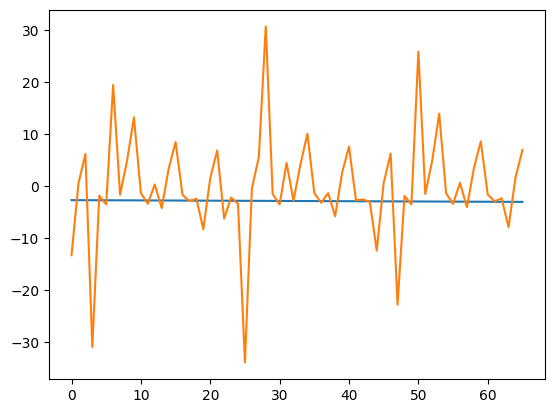

In [30]:
import matplotlib.pyplot as plt

plt.plot(modelPredictions)
plt.plot(actualY)